In [1]:
# ================================
# Price Elasticity Model
# Vaishali Magar
# ================================

# 1. Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# 2. Load Data
df = pd.read_csv(r"C:\Users\Vaishali Magar\Cleaned_Classes_April_June_2018.csv")

print("Shape of dataset:", df.shape)
display(df.head())


Shape of dataset: (3289, 8)


,ActivitySiteID,ActivityDescription,BookingStartTime,MaxBookees,Number_Booked,Price_INR,BookingEndDateTime,DynamicPrice
0,HXP,20-20-20 2.45pm-3.45pm,14:45:00,-0.475775,-0.535512,-1.709436,2018-04-08,-2.26
1,HXP,20-20-20 2.45pm-3.45pm,14:45:00,-0.475775,-0.219810,-1.709436,2018-04-15,-1.69
2,HXP,20-20-20 2.45pm-3.45pm,14:45:00,-0.475775,-0.325044,-1.709436,2018-04-22,-1.88
3,HXP,20-20-20 2.45pm-3.45pm,14:45:00,-0.475775,-0.851213,-1.709436,2018-04-29,-2.26
4,HXP,20-20-20 2.45pm-3.45pm,14:45:00,-0.475775,-1.061680,-1.709436,2018-05-06,-2.26


In [9]:
# 3. Data Preparation
# Use Price_INR as price and Number_Booked as demand
df = df.dropna(subset=["Price_INR", "Number_Booked"])
df = df[df["Price_INR"] > 0]
df = df[df["Number_Booked"] >= 0]


In [8]:
import pandas as pd

df = pd.read_csv("Cleaned_Classes_April_June_2018.csv")
print(df.columns)


Index(['ActivitySiteID', 'ActivityDescription', 'BookingStartTime',
       'MaxBookees', 'Number_Booked', 'Price_INR', 'BookingEndDateTime',
       'DynamicPrice'],
      dtype='object')


Text(0.5, 1.0, 'Price Distribution')

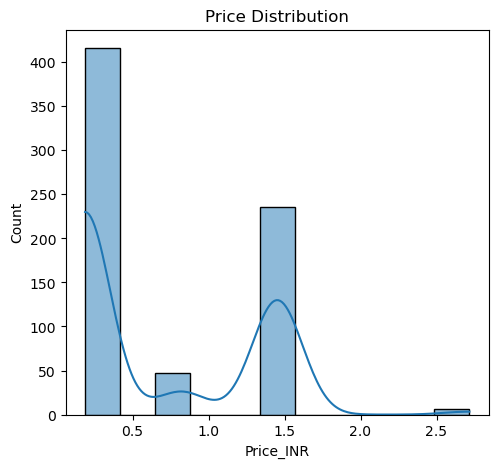

In [10]:
# Check distributions
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df["Price_INR"], kde=True)
plt.title("Price Distribution")

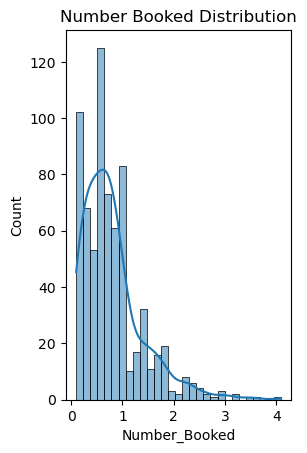

In [11]:
plt.subplot(1,2,2)
sns.histplot(df["Number_Booked"], kde=True)
plt.title("Number Booked Distribution")
plt.show()

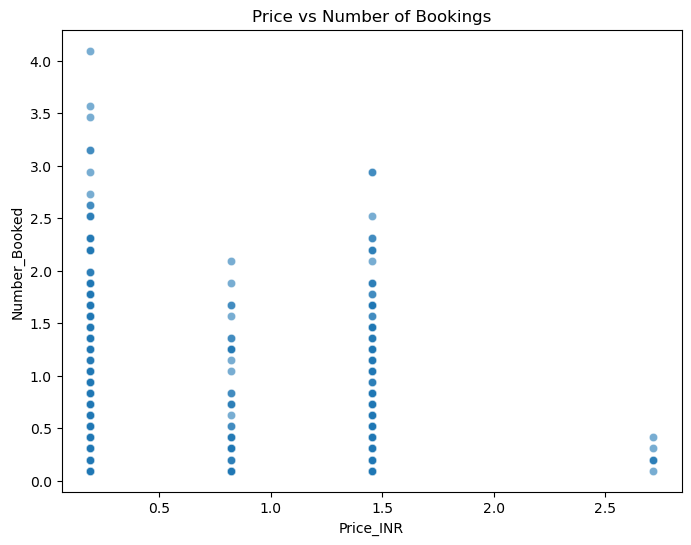

In [12]:
# 4. Price vs Demand
plt.figure(figsize=(8,6))
sns.scatterplot(x="Price_INR", y="Number_Booked", data=df, alpha=0.6)
plt.title("Price vs Number of Bookings")
plt.show()

In [16]:
# 5. Build Regression Model
X = df[["Price_INR"]]
y = df["Number_Booked"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [17]:
# 6. Model Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R² Score:", r2)
print("MSE:", mse)

R² Score: 0.013878401741555746
MSE: 0.31738143831542887


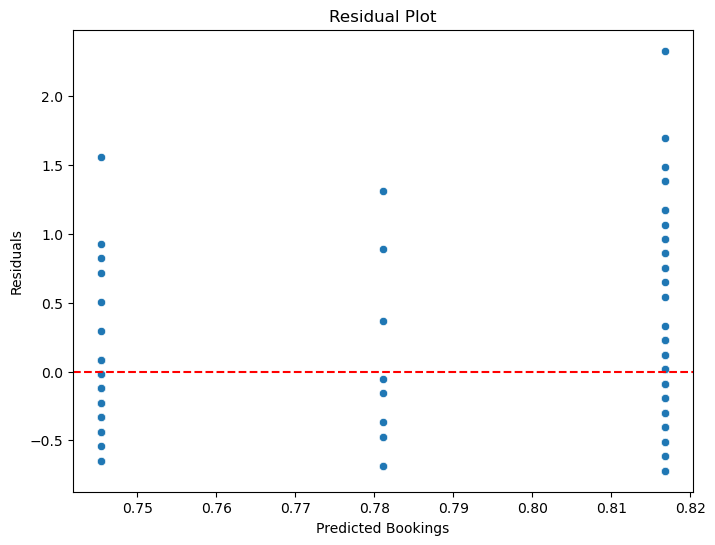

In [18]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residual Plot")
plt.xlabel("Predicted Bookings")
plt.ylabel("Residuals")
plt.show()


In [19]:
# 7. Price Elasticity Calculation
coef = model.coef_[0]
avg_price = df["Price_INR"].mean()
avg_demand = df["Number_Booked"].mean()
elasticity = coef * (avg_price / avg_demand)

print("Price Elasticity of Demand:", elasticity)
if elasticity < -1:
    print("=> Demand is Elastic (sensitive to price changes)")
elif -1 <= elasticity <= 0:
    print("=> Demand is Inelastic (not very sensitive to price changes)")
else:
    print("=> Positive Elasticity (unexpected behavior, check data)")

print("✅ Price Elasticity Analysis Completed")

Price Elasticity of Demand: -0.04797458903456764
=> Demand is Inelastic (not very sensitive to price changes)
✅ Price Elasticity Analysis Completed
